In [1]:
import pandas as pd
import os
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt


from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Data Science Project/data"
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_bids = pd.read_csv("bids.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Data Science Project/data


In [0]:
data_bids = data_bids.replace({' ': ''}, regex = True)
data_bids_sorted = data_bids.sort_values(by=['bidder_id', 'time'], ascending = [True, True]) ##sorting the data by the bidder_id and time 
bids = pd.DataFrame(data = data_bids_sorted["bidder_id"].unique(), columns = ["bidder_id"], index = data_bids_sorted["bidder_id"].unique()) 

In [0]:
counts = data_bids_sorted["bidder_id"].value_counts()
bids["auction_count_num"] = counts
timediff = data_bids_sorted.groupby("bidder_id")["time"].diff()
timediff_str = timediff.astype(str).fillna('')
data_bids_sorted["timediff_num"] = timediff
data_bids_sorted["timediff"] = timediff_str

In [0]:
text_cols = ["auction", "merchandise", "device", "timediff", "country", "ip", "url"]
for col in text_cols:
    text_str = col + "s"
    count_str = col + "_nunique_num"
    bids[text_str] = data_bids_sorted.groupby("bidder_id")[col].unique()
    bids[count_str]  = data_bids_sorted.groupby("bidder_id")[col].nunique()

In [0]:
max_time = data_bids_sorted.groupby("bidder_id")["time"].max()
bids["maxtime"] = max_time
min_time = data_bids_sorted.groupby("bidder_id")["time"].min()
bids["mintime"] = min_time
max_diff = data_bids_sorted.groupby("bidder_id")["timediff_num"].max()
max_diff = max_diff.fillna(max_diff.mean())
bids['maxdiff_num'] = max_diff
min_diff = data_bids_sorted.groupby("bidder_id")["timediff_num"].max()
min_diff = min_diff.fillna(min_diff.mean())
bids['mindiff_num'] = min_diff

In [0]:
overall_train = data_train.merge(data_bids,on="bidder_id")
count_stats = pd.DataFrame(columns = ["country", "count","total","prob"])
for i in data_bids["country"].unique():
  count = overall_train.loc[overall_train["country"] == i]["outcome"].sum()
  total = len(overall_train.loc[overall_train["country"] == i]["outcome"])
  if(count != 0 and total >= 10):
    count_stats = count_stats.append({"country" : i, "count": count, "total": total,"prob" : count/total},ignore_index=True)

In [10]:
count_stats.dropna()

,country,count,total,prob
0,us,66663.0,140043,0.476018
1,in,86386.0,645631,0.133801
2,py,217.0,6126,0.035423
3,ru,11100.0,53874,0.206036
4,th,17282.0,84714,0.204004
...,...,...,...,...
171,bt,3.0,12,0.250000
172,re,6.0,14,0.428571
173,bm,5.0,14,0.357143
174,pg,3.0,292,0.010274


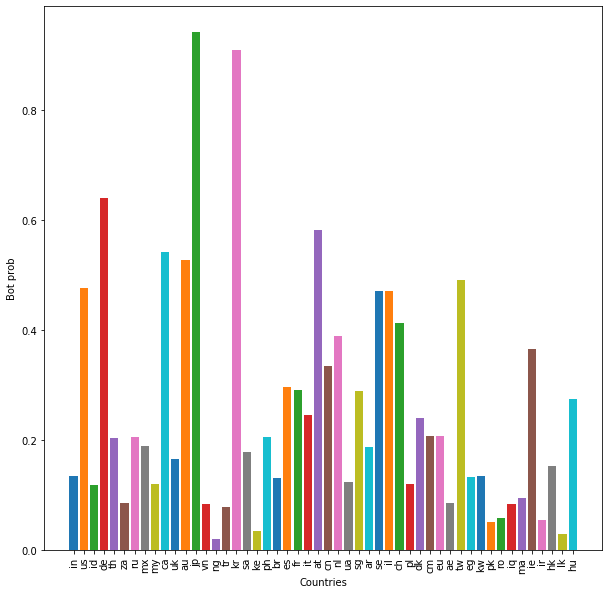

In [11]:
count_stats = count_stats.sort_values(by=["count","total", "prob"], ascending = [False,False,True])
count_stats
plt.figure(figsize=(10,10))
for i in count_stats["country"][:50]:
     plt.bar(i,count_stats.loc[count_stats["country"] == i]["prob"])
plt.xlabel("Countries")
plt.ylabel("Bot prob")
plt.xticks(rotation = 90)
plt.show()

In [14]:
count_stats.loc[count_stats["country"] == "jp"]

,country,count,total,prob
72,jp,7921.0,8419,0.940848


In [0]:
device_stats = pd.DataFrame(columns = ["numDevices", "prob"])
for i in bids["device_nunique_num"].unique():
  count = 0
  total = 0 
  data = bids[bids["device_nunique_num"] == i]
  for j in data["bidder_id"]:
    if j in overall_train["bidder_id"].unique():
      d = overall_train.loc[overall_train["bidder_id"] == j]["outcome"].unique()
      if(d == 1):
        count += 1 
        total += 1 
      else:
        total += 1
  if(count != 0):
    device_stats = device_stats.append({"numDevices" : i, "count": count, "total": total,"prob" : count/total},ignore_index=True)

      

In [114]:
device_stats

,numDevices,prob,count,total
0,1.0,0.034063,14.0,411.0
1,2.0,0.031414,6.0,191.0
2,3.0,0.016667,2.0,120.0
3,8.0,0.046512,2.0,43.0
4,6.0,0.026316,1.0,38.0
...,...,...,...,...
71,514.0,1.000000,1.0,1.0
72,430.0,1.000000,1.0,1.0
73,974.0,1.000000,1.0,1.0
74,371.0,1.000000,1.0,1.0


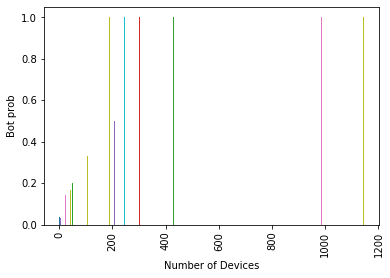

In [120]:
device_stats = device_stats.sort_values(by=["count","total", "prob"], ascending = [False,False,True])
for i in device_stats["numDevices"]:
     plt.bar(i,device_stats.loc[device_stats["numDevices"] == i]["prob"])
plt.xlabel("Number of Devices")
plt.ylabel("Bot prob")
plt.xticks(rotation = 90)
plt.show()

[0.]
